# Darlington Transistor
Author: Radafshar


## Introduction
A **Darlington transistor** is a composite electronic component that integrates two bipolar junction transistors (BJTs) in a cascading configuration. It is widely used for applications requiring high current amplification and sensitivity. This document provides an in-depth look at the structure, advantages, disadvantages, and applications of the Darlington transistor.


## Structure
The Darlington transistor consists of two transistors connected in a manner where the emitter of the first transistor is connected to the base of the second. This arrangement results in a significant amplification of current, as the output current of the first transistor serves as the input current for the second. Consequently, the overall current gain (\( \beta \)) is the product of the individual gains of the two transistors:


\[
\beta_{total} = \beta_1 \times \beta_2
\]

The configuration also includes a base resistor to limit the input current and sometimes additional resistors to stabilize operation.


### Key Features of the Structure
1. **Base-Emitter Junctions**: Two base-emitter junctions in series lead to a higher voltage drop (~1.4V for silicon transistors).
2. **Compactness**: Many Darlington pairs are integrated into a single package to simplify circuit design.
3. **Additional Protection**: Some designs include protection diodes to handle inductive loads.

The following schematic represents the structure of a Darlington pair:



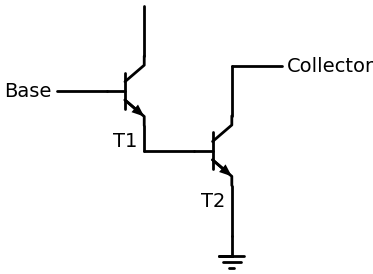

In [20]:
# Drawing the schematic of a Darlington pair
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    # First transistor (T1)
    q1 = d.add(elm.BjtNpn(reverse=False).label("T1", loc="bottom"))
    
    # Emitter of T1 to the base of T2
    d += elm.Line().at(q1.emitter).down().length(0.5)
    d += elm.Line().right().length(1)
    
    # Second transistor (T2)
    q2 = d.add(elm.BjtNpn(reverse=False).label("T2", loc="bottom").anchor('base'))
    
    # Emitter of T2 to ground
    d += elm.Line().at(q2.emitter).down().length(1)
    d += elm.Ground()
    
    # Common collector connection
    d += elm.Line().at(q1.collector).up().length(1)
    d += elm.Line().at(q2.collector).up().length(1)
    d += elm.Line().right().length(1).label("Collector", loc="right")
    
    # Input to base of T1
    d += elm.Line().at(q1.base).left().length(1).label("Base", loc="left")
    
    # Show the schematic
    d.draw()



## Advantages
1. **High Current Gain**: The combined configuration achieves gains exceeding 10,000, making it highly efficient for amplification purposes.
2. **High Input Impedance**: Minimal loading effect on preceding circuits.
3. **Compact Design**: Often available in integrated packages, simplifying circuit design.
4. **Ease of Use**: Can amplify very small currents effectively.

## Disadvantages
1. **High Saturation Voltage**: Requires a higher base-emitter voltage (1.4V for silicon transistors).
2. **Thermal Concerns**: Generates more heat due to increased voltage drops.
3. **Slower Switching**: Takes longer to turn ON or OFF compared to single transistors.
4. **Leakage Current**: Amplifies the leakage current of the first transistor.


## Applications
Darlington transistors are highly versatile and widely used in various electronic systems. Below are expanded applications:

1. **Switching Applications**:
   - **Relay Drivers**: Darlington pairs can control relays that activate high-power circuits with minimal control current.
   - **Motors and Actuators**: Used in DC motor controllers for robotics and industrial machines.
   - **Inductive Loads**: Ideal for handling loads such as solenoids due to their high current capacity.
   - **Touch-Sensitive Circuits**: Utilized in devices requiring high sensitivity to small input currents, such as touch sensors and water-level indicators.

2. **Amplification Applications**:
   - **Audio Systems**: Frequently employed in audio amplifiers due to their high current gain and capability to drive speakers.
   - **Signal Conditioning**: Used in sensor circuits to amplify weak signals for further processing.

3. **Integrated Circuit Solutions**:
   - **ULN2003A and Similar ICs**: These ICs incorporate multiple Darlington pairs, making them ideal for driving stepper motors, LEDs, and other loads in automation systems.
   - **Lighting Control**: Used in applications requiring precise control of light sources, such as dimmers.

4. **High-Power Applications**:
   - **Power Supplies**: Darlington pairs help regulate high current in switching power supplies.
   - **Industrial Automation**: Widely used in controllers for industrial machinery and production systems.

5. **Energy Management**:
   - **Solar Inverters**: Enhance efficiency by amplifying signals in renewable energy systems.
   - **Battery Chargers**: Regulate currents in smart battery charging systems.


## Darlington Transistor vs. MOSFET
When choosing between Darlington transistors and MOSFETs for amplification or switching applications, it's essential to understand their distinct characteristics, advantages, and limitations.

### Darlington Transistors:
- **Structure**: A Darlington transistor combines two BJTs in a configuration where the emitter of the first transistor connects to the base of the second, resulting in high current gain.

- **Advantages**:
  - **High Current Gain**: The combined current gain is the product of the individual transistors' gains, leading to significant amplification.
  - **Robustness**: BJTs, including Darlingtons, are generally robust and less susceptible to certain types of electrical stress.

- **Disadvantages**:
  - **High Saturation Voltage**: Darlingtons exhibit a higher voltage drop when fully on, often around 1V or more, leading to increased power dissipation and heat generation.
  - **Slower Switching Speeds**: The cascading configuration can result in slower response times, making them less suitable for high-speed applications.

### MOSFETs:
- **Structure**: MOSFETs are voltage-driven devices that control current flow through an electric field, offering high input impedance and fast switching capabilities.

- **Advantages**:
  - **Low On-Resistance**: When fully turned on, MOSFETs can have very low resistance, resulting in minimal voltage drop and reduced power loss.
  - **High Switching Speeds**: MOSFETs can switch on and off rapidly, making them ideal for high-frequency applications.
  - **Thermal Efficiency**: Lower power dissipation leads to less heat generation, enhancing efficiency.

- **Disadvantages**:
  - **Gate Drive Requirements**: MOSFETs require appropriate gate voltage levels to switch fully on or off. Logic-level MOSFETs can be driven by lower voltages (e.g., 5V), but standard MOSFETs may require higher gate voltages.
  - **Susceptibility to Voltage Spikes**: Without proper protection, MOSFETs can be sensitive to voltage spikes, especially in inductive load applications.

### Comparison:
- **Efficiency**: MOSFETs generally offer higher efficiency due to lower on-resistance and reduced power dissipation compared to Darlington transistors.
- **Thermal Management**: The higher saturation voltage of Darlingtons leads to greater heat generation, necessitating more robust cooling solutions. MOSFETs, with their lower power loss, often require less stringent thermal management.
- **Switching Speed**: MOSFETs are preferable for applications requiring high-speed switching, such as in switching power supplies or high-frequency signal modulation.
- **Drive Requirements**: Darlington transistors are current-driven and may require higher base current for operation, whereas MOSFETs are voltage-driven and necessitate appropriate gate drive voltages.

### Application Considerations:
- **High-Power Applications**: MOSFETs are often favored in high-power scenarios due to their efficiency and fast switching capabilities.
- **Cost and Availability**: Both components are widely available, but specific application requirements, such as voltage and current ratings, can influence cost considerations.


## Code Simulation
To better understand the behavior of a Darlington transistor, we can simulate its response using `PySpice`.

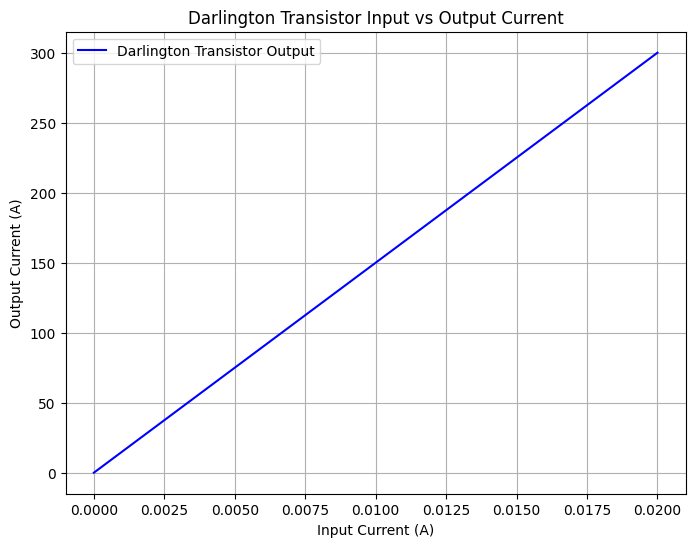

Total Base-Emitter Voltage Drop: 1.4 V


In [1]:
import matplotlib.pyplot as plt
import numpy as np

# تعریف مقادیر اولیه برای ترانزیستور دارلینگتون
beta1 = 100  # بهره ترانزیستور اول
beta2 = 150  # بهره ترانزیستور دوم
Iin = np.linspace(0, 0.02, 100)  # جریان ورودی در محدوده‌ی 0 تا 20 میلی‌آمپر

# محاسبه جریان خروجی
Iout = beta1 * beta2 * Iin

# رسم نمودار جریان ورودی در مقابل جریان خروجی
plt.figure(figsize=(8, 6))
plt.plot(Iin, Iout, label="Darlington Transistor Output", color="blue")
plt.xlabel("Input Current (A)")
plt.ylabel("Output Current (A)")
plt.title("Darlington Transistor Input vs Output Current")
plt.legend()
plt.grid()
plt.show()

# ولتاژ‌های کاری و تحلیل مشخصات
Vbe_on = 0.7  # افت ولتاژ بیس-امیتر برای هر ترانزیستور
Vbe_total = 2 * Vbe_on  # مجموع افت ولتاژ بیس-امیتر در دارلینگتون

print(f"Total Base-Emitter Voltage Drop: {Vbe_total} V")

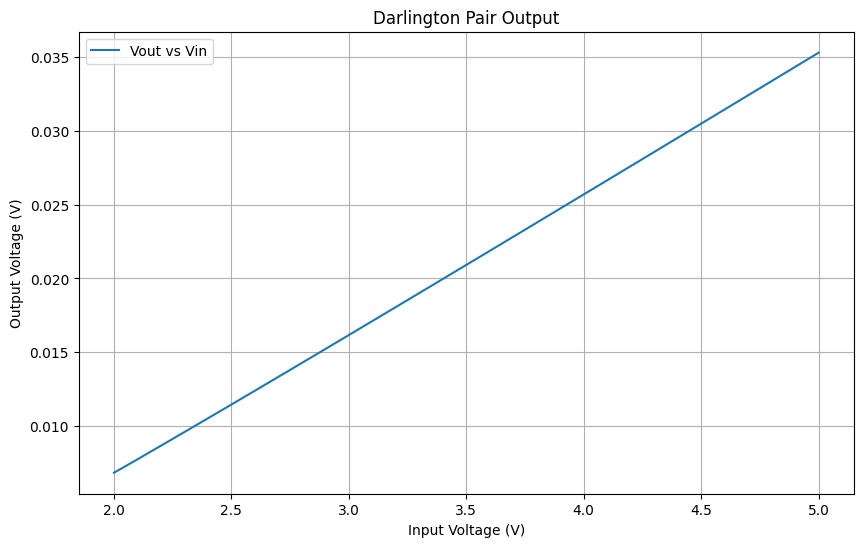

In [18]:
from PySpice.Spice.Netlist import Circuit
from PySpice.Probe.Plot import plot
import matplotlib.pyplot as plt

# Create a new circuit
circuit = Circuit("Darlington Pair")

# Define the SPICE model directly in the script
circuit.model('2N2222', 'NPN', 
    IS=1e-14, BF=200, NF=1, VAF=100, IKF=0.3, 
    ISE=2e-14, NE=1.5, BR=3, NR=1, VAR=50, IKR=0.05, 
    ISC=1e-13, NC=2, 
    RB=10, RC=0.3, RE=0.2, 
    CJE=2e-12, VJE=0.75, MJE=0.33, TF=400e-12, 
    CJC=2e-12, VJC=0.75, MJC=0.33, TR=50e-9
)

# Define the Darlington pair
# First transistor
circuit.BJT(1, 'NODE1', 'BASE', 'EMITTER', model='2N2222')  
# Second transistor
circuit.BJT(2, 'OUT', 'NODE1', 'EMITTER', model='2N2222')

# Add resistors and voltage source
circuit.R(1, 'BASE', 'V_IN', 1e3)      # Base resistor
circuit.R(2, 'OUT', 'GND', 10)         # Load resistor
circuit.V(1, 'V_IN', 'GND', 2)         # Input voltage source (start at 2V to bias properly)

# Simulate the circuit
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.dc(V1=slice(2, 5, 0.1))  # Sweep the input voltage from 2V to 5V

# Plot the output
plt.figure(figsize=(10, 6))
plt.plot(analysis['V_IN'], analysis['OUT'], label='Vout vs Vin')
plt.title('Darlington Pair Output')
plt.xlabel('Input Voltage (V)')
plt.ylabel('Output Voltage (V)')
plt.grid()
plt.legend()
plt.show()


### Conclusion:
While both Darlington transistors and MOSFETs have their respective advantages, MOSFETs are generally preferred in modern electronic designs for switching and amplification tasks due to their higher efficiency, faster switching speeds, and better thermal performance. However, the choice between the two should be guided by the specific requirements of the application, including factors like load characteristics, switching frequency, and drive circuitry.

**References**:
1. [Using MOSFETs versus Darlington Transistors](https://forum.arduino.cc/t/using-mosfets-versus-darlington-transistors/193488)
2. [Is there any reason to use junction or Darlington transistors for power applications?](https://electronics.stackexchange.com/questions/235668/is-there-any-reason-to-use-junction-or-darlington-transistors-for-power-applicat)
3. [Practical differences between Transistor and MOSFET](https://www.eevblog.com/forum/beginners/practical-differences-between-transistor-and-mosfet/)
4. [Darlington Transistor vs. MOSFET](https://forums.parallax.com/discussion/71139/darlington-transistor-vs-mosfet)